In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

In [9]:
df = pd.read_csv("Fish_dataset.csv")

In [10]:
df.shape

(159, 7)

In [11]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


There are total 159 rows(training samples) and 7 columns in dataset.

Features/input values/independent variables are 'Species', 'Length1','Length2', 'Length3', 'Height' and 'Width'
Target/output value/dependent variable is 'Weight'
    
So, we have to estimate the weight of the fish based on its measurement values.
    
Let's change the name of columns lenght1,length2 and length3 as per the content of it.    

In [12]:
df.rename(columns={"Length1" : "VerticalLen", 
                   "Length2" : "DiagnolLen", 
                   "Length3" : "CrossLen"
    
}, inplace = True)

In [14]:
df.sample(5)

,Species,Weight,VerticalLen,DiagnolLen,CrossLen,Height,Width
61,Parkki,55.0,13.5,14.7,16.5,6.8475,2.3265
29,Bream,1000.0,33.5,37.0,42.6,18.9570,6.6030
144,Pike,1650.0,59.0,63.4,68.0,10.8120,7.4800
100,Perch,197.0,23.5,25.6,27.0,6.5610,4.2390
128,Pike,200.0,30.0,32.3,34.8,5.5680,3.3756


In [15]:
# Detailed Information of our dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Species      159 non-null    object 
 1   Weight       159 non-null    float64
 2   VerticalLen  159 non-null    float64
 3   DiagnolLen   159 non-null    float64
 4   CrossLen     159 non-null    float64
 5   Height       159 non-null    float64
 6   Width        159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [16]:
# Check for missing values

df.isnull().sum()

Species        0
Weight         0
VerticalLen    0
DiagnolLen     0
CrossLen       0
Height         0
Width          0
dtype: int64

In [17]:
# Count for each species

df.Species.value_counts()

Species
Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: count, dtype: int64

In [34]:
df_sp = df.Species.value_counts()
df_sp = pd.DataFrame(df_sp)
df_sp.columns = ["Count"]
df_sp.T

Species,Perch,Bream,Roach,Pike,Smelt,Parkki,Whitefish
Count,56,35,20,17,14,11,6


In [25]:
df_sp.head()

,count
Species,
Perch,56
Bream,35
Roach,20
Pike,17
Smelt,14


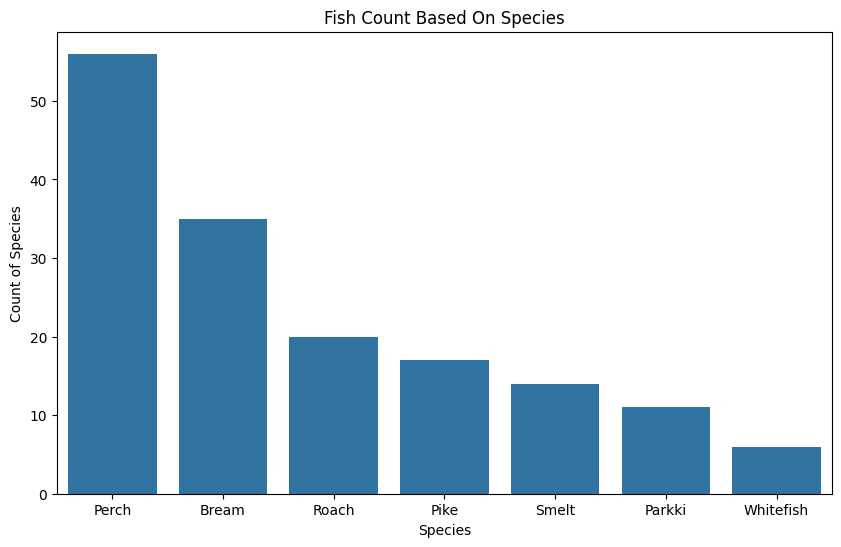

In [35]:
sns.barplot(x=df_sp.index, y=df_sp["Count"])
plt.xlabel("Species")
plt.ylabel("Count of Species")
plt.rcParams["figure.figsize"] = (10, 6)
plt.title("Fish Count Based On Species")
plt.show()

As you can see our dataset is very small. 

We have only 6 training example for 'Whitefish' species.

Ideal approach would be to divide the dataset and do the prediction for each species.

But since we don't have enough data we will ignore the different species during our analysis.

Depending on the maximum and minimum weight of fish for each species we can very easily remove the outliers. 

But because of limited data we are going to ignore the individual species and treat them as one.

Now lets use some common sense and find and remove the training data where weight of fish is 0 or negative

In [36]:
df[df.Weight <= 0]

,Species,Weight,VerticalLen,DiagnolLen,CrossLen,Height,Width
40,Roach,0.0,19.0,20.5,22.8,6.4752,3.3516


Lets drop the training data at row 40. 

Note: Anytime we make changes in dataframe we are going to increament the dataframe name by 1

In [37]:
df1 = df.drop([40])
print("New dimension of dataset is = ", df1.shape)
df.head()

New dimension of dataset is =  (158, 7)


,Species,Weight,VerticalLen,DiagnolLen,CrossLen,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


Correlation helps us investigate and establish relationships between variables

Note that high amount of correlation between independent variables suggest that linear regression estimation will be unreliable

In [49]:
# Calculating Variation Inflation Factor (VIF)
def calculate_vif(df1):
    numeric_df = df1.select_dtypes(include=[np.number])
    scaler = StandardScaler()
    df_scaled = pd.DataFrame(scaler.fit_transform(numeric_df), columns=numeric_df.columns)
    df_scaled["Intercept"] = 1
    vif_data = pd.DataFrame()
    vif_data["Variable"] = df_scaled.columns
    vif_data["VIF"] = [variance_inflation_factor(df_scaled.values, i) for i in range(df_scaled.shape[1])]
    return vif_data

In [50]:
vif_result = calculate_vif(df)
print(vif_result)

      Variable          VIF
0       Weight     8.717385
1  VerticalLen  1707.927219
2   DiagnolLen  2084.590610
3     CrossLen   430.193929
4       Height    15.570803
5        Width    12.372999
6    Intercept     1.000000


The high VIF values indicate strong multicollinearity between some of the independent variables, especially for VerticalLen, DiagnolLen, and CrossLen. Here’s what this suggests:

VIF > 10 is generally considered problematic and signals strong multicollinearity. For example:

DiagnolLen has a VIF of 2084, which means it is highly correlated with other variables.
VerticalLen and CrossLen also show very high multicollinearity.

High Multicollinearity: When variables are highly correlated, they provide redundant information, leading to unstable and unreliable coefficients in linear regression.

This makes it harder to determine the true relationship between each independent variable and the dependent variable.

In [54]:
correlation = df1.corr(numeric_only=True)
correlation

,Weight,VerticalLen,DiagnolLen,CrossLen,Height,Width
Weight,1.000000,0.915719,0.918603,0.923090,0.723857,0.886654
VerticalLen,0.915719,1.000000,0.999516,0.992004,0.624409,0.866684
DiagnolLen,0.918603,0.999516,1.000000,0.994083,0.639503,0.873201
CrossLen,0.923090,0.992004,0.994083,1.000000,0.702655,0.878189
Height,0.723857,0.624409,0.639503,0.702655,1.000000,0.792401
Width,0.886654,0.866684,0.873201,0.878189,0.792401,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

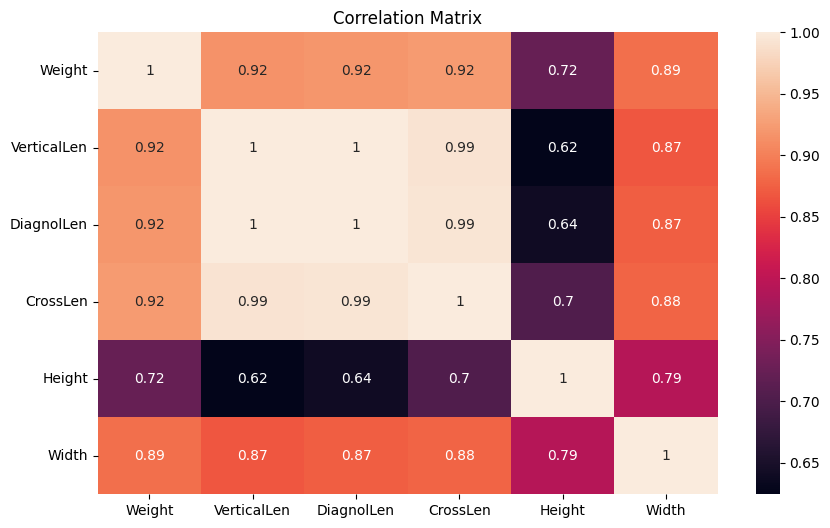

In [55]:
plt.rcParams["figure.figsize"] = (10, 6)
sns.heatmap(correlation, annot=True)
plt.title("Correlation Matrix")

Reading Correlation Matrix

Correlation coefficient range from -1 to +1
    
Sign(+/-) indicate the direction and amount indicate the strength of correlation
     
+1.00 means perfect positive relationship
     
0.00 means no relationship

-1.00 means perfect negative relationship
     
The correlation between 'VerticalLen', 'DiagonalLen' and 'Crosslen' is almost 1. 
                                     
This will cause 'Multicolinearity' and if we don't take care of it, it may lead to unreliable predictions.

Let's drop the 'VerticalLen', 'DiagonalLen' and 'Crosslen' column.

In [56]:
df1.columns

Index(['Species', 'Weight', 'VerticalLen', 'DiagnolLen', 'CrossLen', 'Height',
       'Width'],
      dtype='object')

In [57]:
df2 = df1.drop(["VerticalLen", "DiagnolLen", "CrossLen"], axis=1)

In [58]:
print("New dimension of dataset is = ", df2.shape)
df2.head()

New dimension of dataset is =  (158, 4)


,Species,Weight,Height,Width
0,Bream,242.0,11.5200,4.0200
1,Bream,290.0,12.4800,4.3056
2,Bream,340.0,12.3778,4.6961
3,Bream,363.0,12.7300,4.4555
4,Bream,430.0,12.4440,5.1340


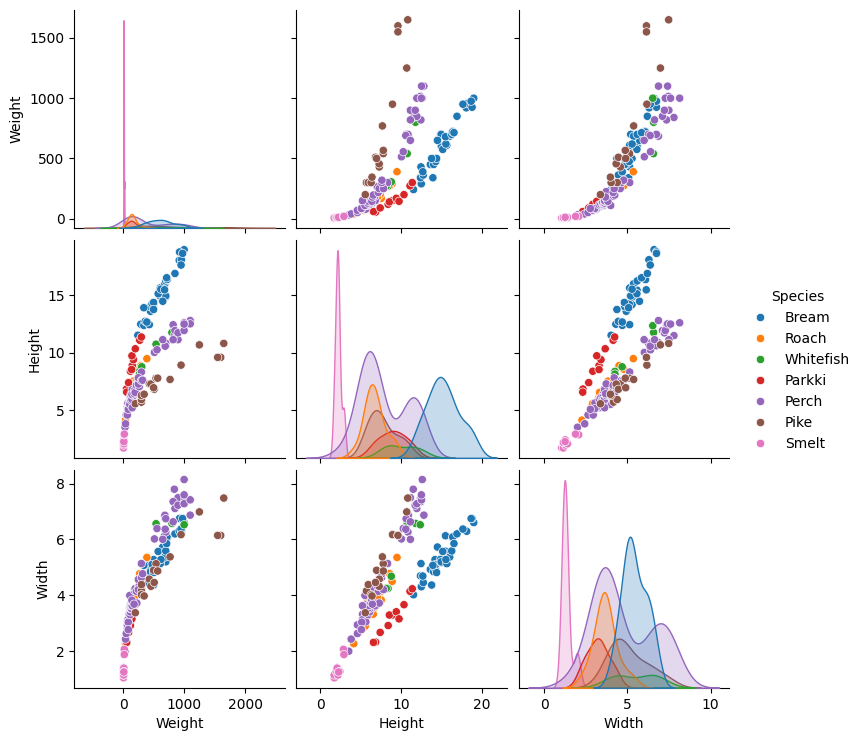

In [59]:
# Visualization using pariplot

sns.pairplot(df2, kind="scatter", hue="Species")

From the above pair plot, we can see that there seems to be some correlations between Height, Width and the Weight. Note that since we have multiple species the correlation between Height and Width of all species is not exactly linear with Weight.

Now, since we have the final dataset ready lets analyze and remove the outliers if any

Text(0.5, 1.0, 'Outlier Detection based on Weight')

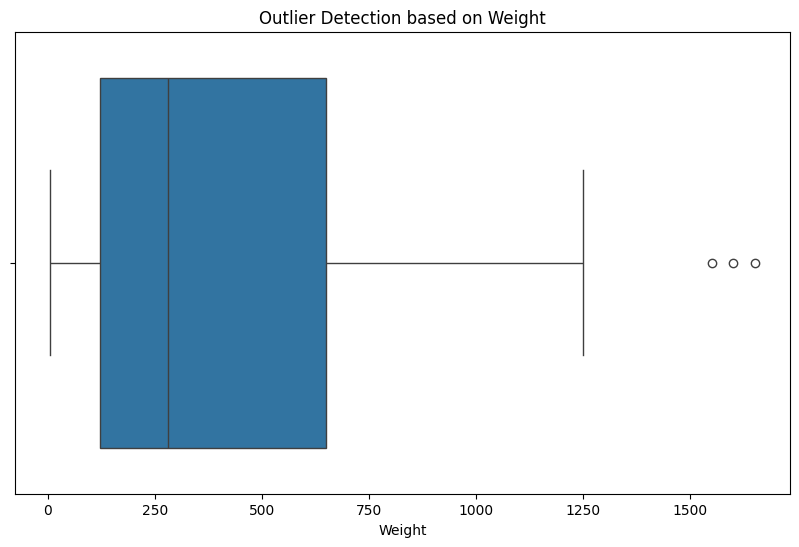

In [60]:
# Outlier Detection and Removal

sns.boxplot(x=df2["Weight"])
plt.title("Outlier Detection based on Weight")

From above plot its clear that there are three outlier as per the 'Weight' data. Lets create a function to find the index of these outliers.

In [63]:
def outlier_detection(dataframe):
    Q1 = dataframe.quantile(0.25)
    Q3 = dataframe.quantile(0.75)
    IQR = Q3 - Q1
    upper_end = Q3 + 1.5 * IQR
    lower_end = Q1 - 1.5 * IQR
    outlier = dataframe[(dataframe > upper_end) | (dataframe < lower_end)]
    return outlier

In [64]:
outlier_detection(df2["Weight"])

142    1600.0
143    1550.0
144    1650.0
Name: Weight, dtype: float64

So based on 'Weight' data, index 142, 143 and 144 are outliers

Lets check for 'Height' data

Text(0.5, 1.0, 'Outlier Detection based on height')

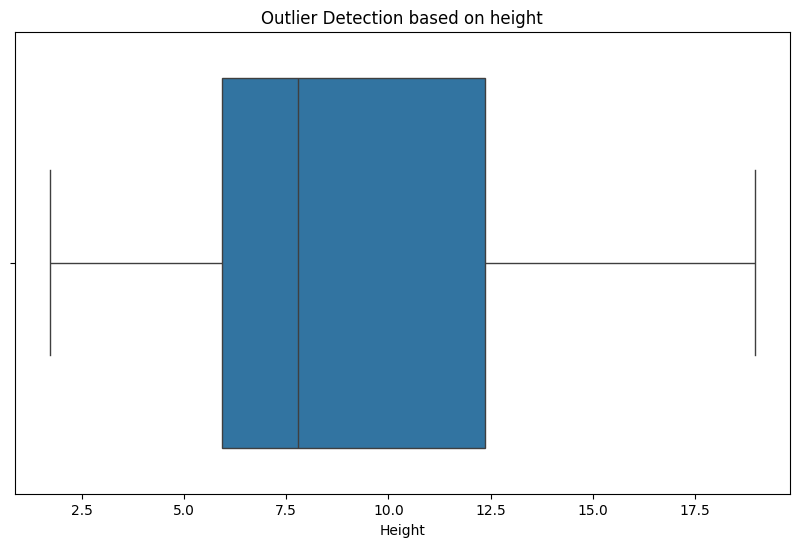

In [65]:
sns.boxplot(x=df2["Height"])
plt.title("Outlier Detection based on height")

There is no outlier so no need to call 'outlier_detection()' function.

Lets check for 'Width' data

Text(0.5, 1.0, 'Outliers Detection based on Width')

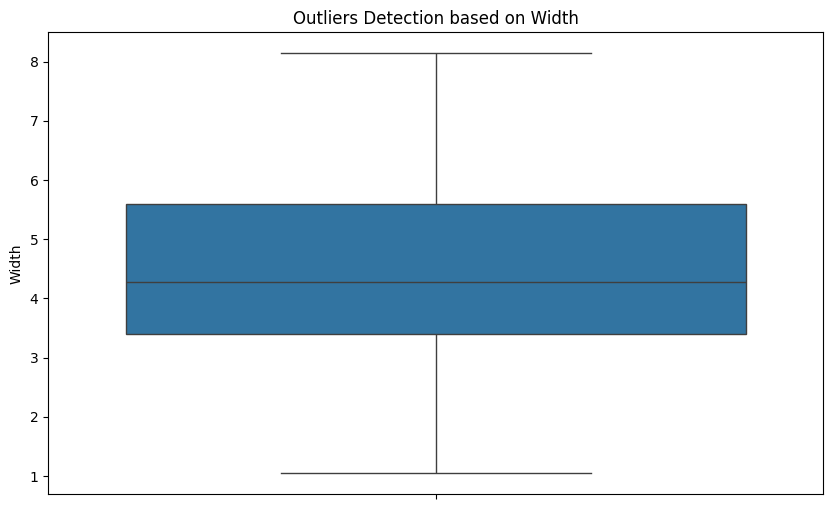

In [66]:
sns.boxplot(data=df2["Width"])
plt.title("Outliers Detection based on Width")

There is no outlier so no need to call 'outlier_detection()' function.

In [67]:
df3 = df2.drop([142, 143, 144])
df3.shape

(155, 4)

In [68]:
df3.describe().T

,count,mean,std,min,25%,50%,75%,max
Weight,155.0,377.638065,319.144511,5.9000,120.00000,272.0000,615.00000,1250.000
Height,155.0,8.967102,4.333722,1.7284,5.92695,7.6800,12.37930,18.957
Width,155.0,4.382326,1.675564,1.0476,3.38565,4.2476,5.47275,8.142


# Building Machine Learning Model

In [74]:
# Create Feature Matrix X and Target Variable y

In [75]:
X = df3[["Height", "Width"]]
X.head()

,Height,Width
0,11.5200,4.0200
1,12.4800,4.3056
2,12.3778,4.6961
3,12.7300,4.4555
4,12.4440,5.1340


In [76]:
y = df3 [["Weight"]]
y.head()

,Weight
0,242.0
1,290.0
2,340.0
3,363.0
4,430.0


Create test and train datatset

We will split the dataset, so that we can use one set of data for training the model and one set of data for testing the model

We will keep 20% of data for testing and 80% of data for training the model

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(" X_train dimension = ", X_train.shape)
print(" X_test dimension = ", X_test.shape)
print(" y_train dimension = ", y_train.shape)
print(" X_train dimension = " , y_test.shape)

 X_train dimension =  (124, 2)
 X_test dimension =  (31, 2)
 y_train dimension =  (124, 1)
 X_train dimension =  (31, 1)


Ordinary Least Squares Algorithm

Lets the train the model using Ordinary Least Squares Algorithm

This is one of the most basic linear regression algorithm.

Mathematical formula used by ordinary least square algorithm is as below,

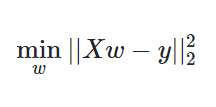

The objective of Ordinary Least Square Algorithm is to minimize the residual sum of squares. Here the term residual means 'deviation of predicted value(Xw) from actual value(y)'

Note that, problem with ordinary least square model is size of coefficients increase exponentially with increase in model complexity

In [78]:
model = linear_model.LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [81]:
print("coef = ", model.coef_)
print("intercept = ", model.intercept_)
print("score = ", model.score(X_test, y_test))

coef =  [[ 10.40686081 151.73209963]]
intercept =  [-386.16761436]
score =  0.8960229976573091


# Predicting The Test Data

Check below table for weight from test data and predicted weight by our model

We will also plot the scatter plot of weight from test data vs predicted weight

In [84]:
predicted_weight = pd.DataFrame(model.predict(X_test), columns=["Predicted Weight"])

actual_weight = pd.DataFrame(y_test)

actual_weight = actual_weight.reset_index(drop=True)

df_actual_vs_predicted = pd.concat([actual_weight, predicted_weight], axis=1)

df_actual_vs_predicted.T

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
Weight,110.000000,7.500000,955.000000,1000.0000,850.000000,55.000000,150.000000,10.000000,19.700000,200.000000,...,500.000000,500.000000,700.000000,273.000000,430.000000,225.000000,140.000000,120.000000,130.000000,1000.000000
Predicted Weight,212.481055,-189.636049,756.728427,813.0023,816.240658,38.098095,218.321182,-168.334196,-42.610188,277.385406,...,419.788276,514.386807,630.875714,358.001479,384.100355,254.628228,186.506555,207.382732,216.491025,896.328271


As you can see from above comparison, predicted weights are negative when actual weights are smaller than 20gm

We can also visualize the above comparison using scatter plots

Text(0.5, 1.0, 'Weight From test Data Vs Weight Predicted By Model')

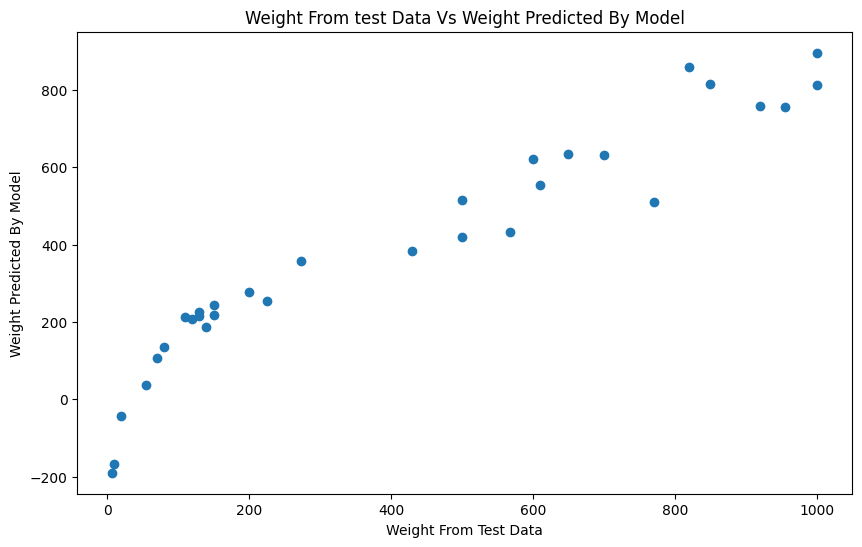

In [85]:
plt.scatter(y_test, model.predict(X_test))
plt.xlabel("Weight From Test Data")
plt.ylabel("Weight Predicted By Model")
plt.rcParams["figure.figsize"] = (10, 6)
plt.title("Weight From test Data Vs Weight Predicted By Model")

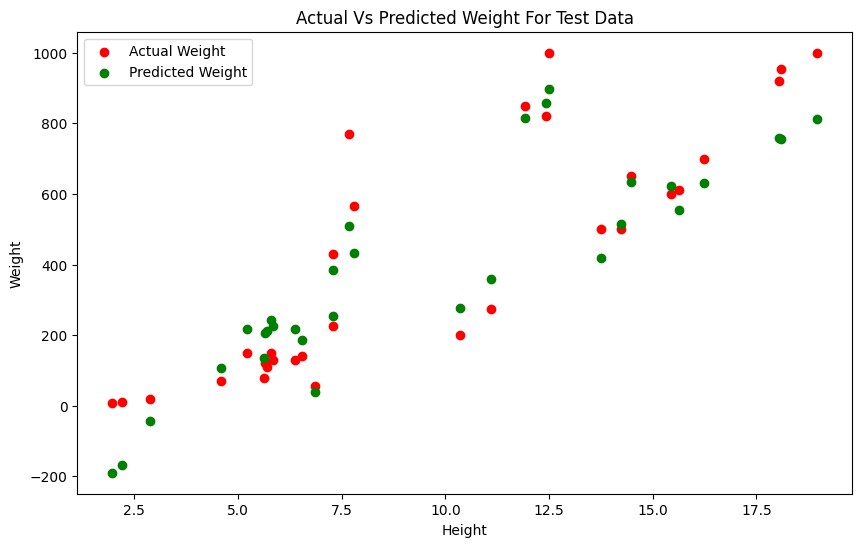

In [88]:
plt.scatter(X_test["Height"], y_test, color="red", label="Actual Weight")

plt.scatter(X_test["Height"], model.predict(X_test), color="green", label="Predicted Weight")

plt.xlabel("Height")
plt.ylabel("Weight")
plt.rcParams["figure.figsize"] = (10, 6)
plt.title("Actual Vs Predicted Weight For Test Data")
plt.legend()
plt.show()

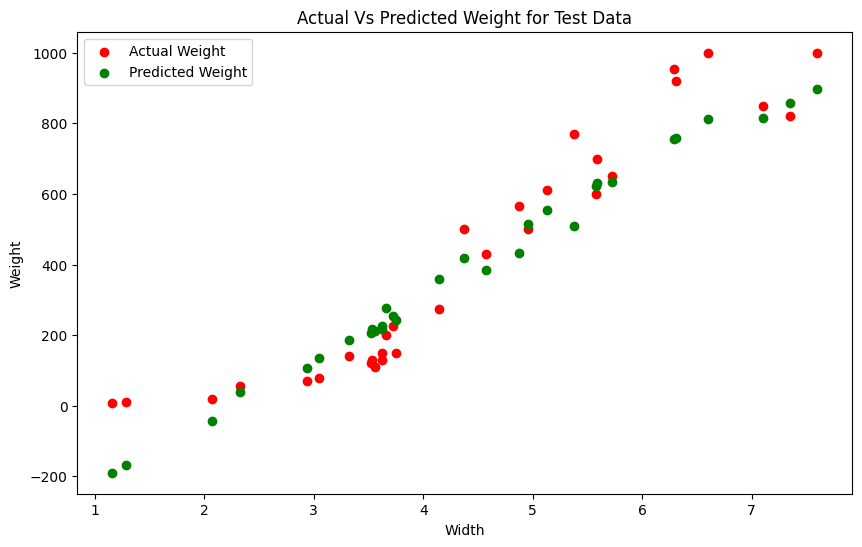

In [89]:
plt.scatter(X_test["Width"], y_test, color="red", label="Actual Weight")
plt.scatter(X_test["Width"], model.predict(X_test), color="green", label="Predicted Weight")
plt.xlabel("Width")
plt.ylabel("Weight")
plt.rcParams["figure.figsize"] = (10, 6)
plt.title("Actual Vs Predicted Weight for Test Data")
plt.legend()
plt.show()

# Evaluating the Model

Text(0.5, 1.0, 'Histogram of Residuals')

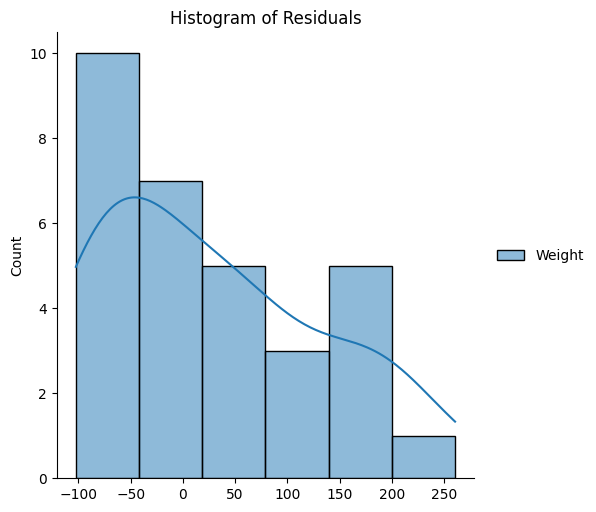

In [93]:
sns.displot((y_test-model.predict(X_test)), kde=True)
plt.rcParams["figure.figsize"] = (10, 6)
plt.title("Histogram of Residuals")

# Conclusion

As you can see from above results our model score is 89.6%, which is good enough to start with.

But one issue with prediction is negative weight values. This behavior is true for smaller(less than 20gm) weight values.

In machine learning, every time we are solving a problem we make some choices which affect the results.

We have also made few choices like treating all species as one since we have small dataset.

I will try again with different approach to try an eliminate the negative weight values.